In [28]:
%pip install pandas
%pip install openpyxl
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
                                              0.0/7.6 MB ? eta -:--:--
                                              0.2/7.6 MB 4.8 MB/s eta 0:00:02
     --                                       0.4/7.6 MB 4.9 MB/s eta 0:00:02
     ---                                      0.6/7.6 MB 5.1 MB/s eta 0:00:02
     ----                                     0.8/7.6 MB 4.8 MB/s eta 0:00:02
     ----                                     0.9/7.6 MB 5.4 MB/s eta 0:00:02
     -----                                    1.0/7.6 MB 4.6 MB/s eta 0:00:02
     ------                                   1.3/7.6 MB 4.7 MB/s eta 0:00:02
     -------                                  1.4/7.6 MB 4.8 MB/s eta 0:00:02
     --------                                 1.7/7.6 MB 5.2 MB/s eta 0:00:02
     ----------                               2.0/7.6 MB 5.2 MB/s eta 0:00:02
     ----------- 

In [31]:

import pandas as pd

data1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
data2 = pd.read_excel('ruta_del_archivo.xlsx', sheet_name='Year 2010-2011')
data = pd.concat([data1, data2])


In [10]:
data.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [12]:
data.describe()


,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [24]:
# Chequear formato de fecha y hora
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Formar columnas de mes y año
data['Month'] = data['InvoiceDate'].dt.month
data['Year'] = data['InvoiceDate'].dt.year


### País que más productos consume

In [30]:
# Consumos por países 
country_consumption = data.groupby('Country')['Quantity'].sum()
# País que más consume
max_consumption_country = country_consumption.idxmax()
print(f"El país que más productos consume es: {max_consumption_country}")
print(country_consumption)


El país que más productos consume es: United Kingdom
Country
Australia                 20053
Austria                    6479
Bahrain                    1015
Belgium                   11980
Bermuda                    2798
Brazil                      189
Canada                      894
Channel Islands           10994
Cyprus                     4371
Denmark                  227030
EIRE                     188704
Finland                    3651
France                    74471
Germany                  107133
Greece                     6151
Hong Kong                  2306
Iceland                     828
Israel                     1132
Italy                      7310
Japan                      6604
Korea                       598
Lebanon                      71
Lithuania                  2306
Malta                      1547
Netherlands              181823
Nigeria                      56
Norway                     7863
Poland                     1991
Portugal                  11878
RSA        

### Top de ventas totales por producto

In [22]:
n = 5
# Ventas totales por producto
product_sales = data.groupby('StockCode')['Quantity'].sum()
top_selling_products = product_sales.nlargest(n)
print("Productos más vendidos:")
print(top_selling_products)

print("********************************")

# Ganancias totales por producto
print("\nProductos con más ganancias:")
data['TotalRevenue'] = data['Price'] * data['Quantity']
product_revenue = data.groupby('StockCode')['TotalRevenue'].sum()
top_profitable_products = product_revenue.nlargest(n)

print(top_profitable_products)

Productos más vendidos:
StockCode
21212     59411
85123A    57236
84077     54698
85099B    48376
17003     47647
Name: Quantity, dtype: int64
********************************

Productos con más ganancias:
StockCode
22423     163051.46
85123A    155825.52
DOT       116401.99
85099B     88922.48
84879      72454.12
Name: TotalRevenue, dtype: float64


### Ventas por mes del año

In [25]:
monthly_sales = data.groupby(['Year', 'Month'])['Quantity'].sum()
print(monthly_sales)

Year  Month
2009  12       420088
2010  1        375363
      2        368402
      3        489370
      4        351971
      5        364095
      6        388253
      7        302201
      8        451803
      9        478262
      10       601729
      11       673856
      12       166648
Name: Quantity, dtype: int64


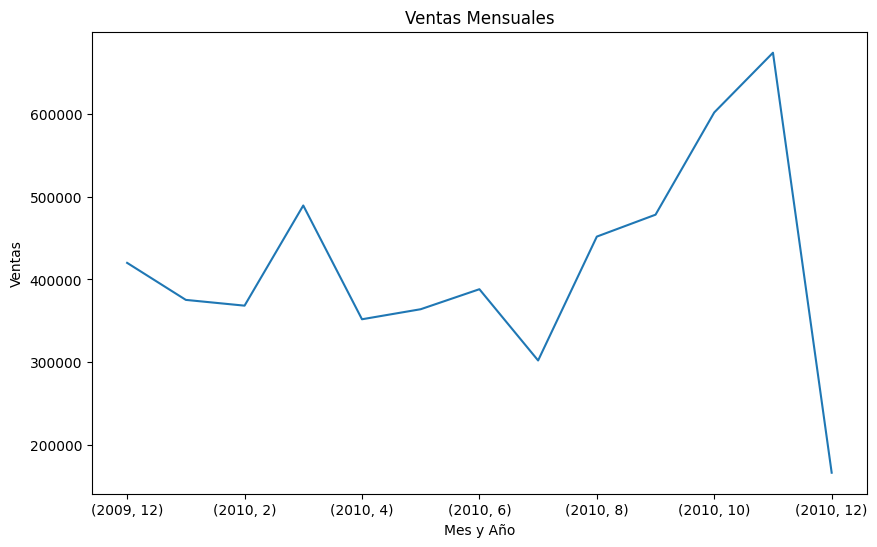

In [29]:
# Gráficas
import matplotlib.pyplot as plt

# Graficar las ventas mensuales
monthly_sales.plot(kind='line', figsize=(10, 6))
plt.xlabel('Mes y Año')
plt.ylabel('Ventas')
plt.title('Ventas Mensuales')
plt.show()


### Análisis de gráfica
Se evidencia un pico considerable de ventas en noviembre de 2010. También hay un pequeño pico en las ventas de marzo de 2010, mientras que en julio las ventas tuvieron su valor mínimo.